<h1>Linear Algebra and its Applications</h1>
<h3>Fifth Edition<br>by Lay, Lay, and McDonald</h3>
<p>Notes and examples of how to use Python for linear algebra problem solving by Michael K Schumacher<br><a href="http://mkschumacher.com">mkschumacher.com</a></p>

In [1]:
"""
Python version 2.7, running in Jupyter notebook
Encoding: UTF-8
"""

# Import the necessary modules to work with linear algebra

# Sympy and numpy will be used for arrays, matrices, symbolic algebra, etc
import sympy as sy
import numpy as np

# Matplotlib.pyplot will be used for plotting graphs
import matplotlib.pyplot as plt
%matplotlib notebook

# Will use init_printing to display nice, LaTeX-based matrices, etc
from sympy.interactive.printing import init_printing
init_printing(use_unicode=False, wrap_line=False, no_global=True)

<h2>Section 1.1</h2>

<h3>Preliminaries: How to plot graphs</h3>
<p>A demonstration of how to plot figures 1 and 2 with Python to check for solutions of a system of equations in two variables</p>
<p>To plot implicit functions of 2 variables, Sympy's <b>plot_implicit</b> function will be used, and to get multiple plots on a single graph, Sympy's <b>Or</b> function will be used</p>

<h4>Figure 1:</h4>
<p>$ x_1 - 2 x_2 = -1$<br>$-x_1 + 3 x_2 = 3$</p>

<IPython.core.display.Javascript object>


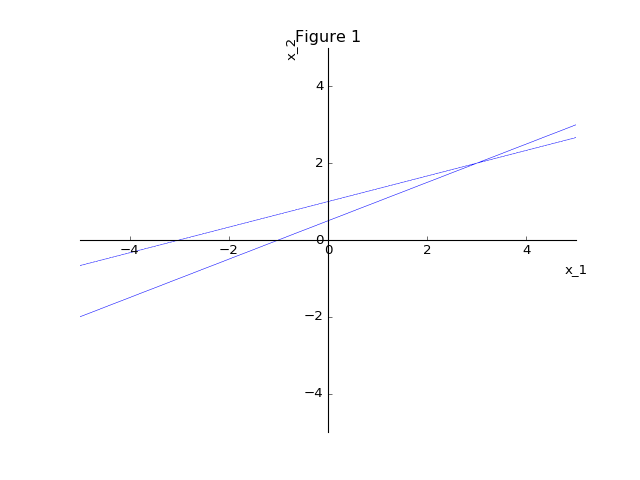

In [2]:
x_1 = sy.Symbol('x_1')
x_2 = sy.Symbol('x_2')

sy.plotting.plot_implicit(sy.Or(sy.Eq(x_1 - 2*x_2, -1), sy.Eq(-x_1 + 3*x_2, 3)), title="Figure 1")

<p>Clearly this system has one solution, where the two lines intersect</p>

<h4>Figure 2(a)</h4>
<p>$x_1 - 2 x_2 = -1$<br>$-x_1 + 2 x_2 = 3$</p>

<IPython.core.display.Javascript object>


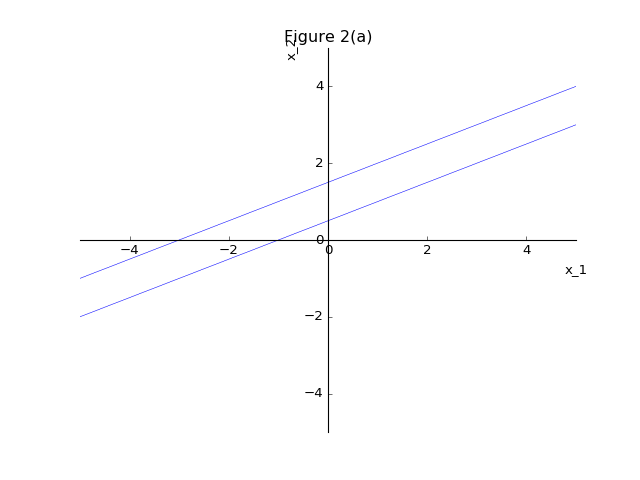

In [3]:
sy.plotting.plot_implicit(sy.Or(sy.Eq(x_1 - 2*x_2, -1), sy.Eq(-x_1 + 2*x_2, 3)), title="Figure 2(a)")

<p>This system has no solution, demonstrated by the parallel lines</p>

<h4>Figure 2(b)</h4>
<p>$x_1 - 2 x_2 = -1$<br>$-x_1 + 2 x_2 = 1$</p>

<IPython.core.display.Javascript object>


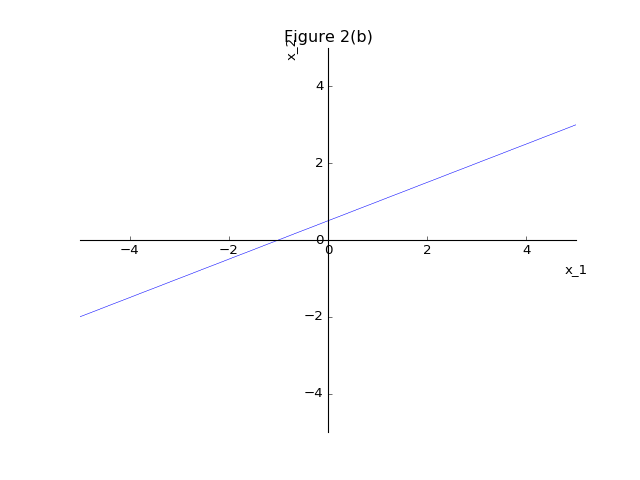

In [4]:
sy.plotting.plot_implicit(sy.Or(sy.Eq(x_1 - 2*x_2, -1), sy.Eq(-x_1 + 2*x_2, 1)), title="Figure 2(b)")

<p>This system has infinitely many solutions; the graphs are identical</p>

<h3>Preliminaries: Working with matrices in Python</h3>

<p>There are a few ways to deal with matrix algebra in Python, but one of the simplest is with Sympy's Matrix objects. This is especially simpler when there will be unknown variables in the matrix that need to be used in calculations.</p>

<p>Taking the system given in (3) on page 4 as an augmented matrix:</p>
<p>$x_1 - 2 x_2 + x_3 = 0$<br>$2 x_2 - 8 x_3 = 8$<br>$5 x_1 - 5 x_3 = 10$</p>

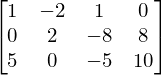

In [5]:
A = sy.Matrix([[1,-2,1,0], [0,2,-8,8], [5,0,-5,10]])
A

<p>This can also be achieved by passing arguments for number of rows, number of columns, then one array with all numbers going left-to-right and top-to-bottom. This method can be easier to type, but also makes it much easier to make a mistake.</p>

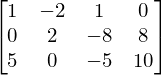

In [6]:
B = sy.Matrix(3, 4, [1,-2,1,0,0,2,-8,8,5,0,-5,10])
B

<h3>Example 1: Solving a system of 3 equations in 3 variables</h3>
<p>This example uses the same system given above in Preliminaries: Working with matrices in Python</p>
<p>The simplest method of solving this is by using the <b>sy.Matrix</b> object's built-in <b>rref</b> function to get reduced row echelon form</p>

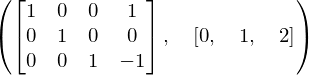

In [7]:
A.rref()

<p>From this we can see that<br>$x_1 = 1$<br>$x_2 = 0$<br>$x_3 = -1$</p>
<p>So a solution of the system is $(1, 0, -1)$</p>

<h3>Example 2: Testing for existence and uniqueness</h3>
<p>Test if the following system is consistent (i.e. at least one solution exists):</p>
<p>$x_1 - 2 x_2 + x_3 = 0$<br>$2x_2 - 8x_3 = 8$<br>$5x_1 - 5x_3 = 10$</p>
<p>First set it up as an augmented matrix, and get into <b>rref</b> form to determine consistency</p>

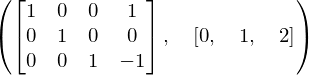

In [8]:
A = sy.Matrix([[1,-2,1,0], [0,2,-8,8], [5,0,-5,10]])
A.rref()

<p>Since there are no logical inconsistencies, the system has at least one solution. Since each of the variables are independent, the solution is unique.</p>

<h3>Example 3: Testing another system for consistency</h3>

<p>Determine if the following system is consistent:</p>
<p>$x_2 - 4x_3 = 8$<br>$2x_1 - 3x_2 + 2x_3 = 1$<br>$4x_1 - 8x_2 + 12x_3 = 1$</p>

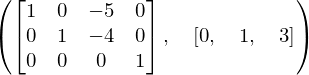

In [9]:
A = sy.Matrix([[0,1,-4,8], [2,-3,2,1], [4,-8,12,1]])
A.rref()

<p>Since the reduced echelon form gives $0 = 1$ in the last row -- an obvious mathematical impossibility -- the system is inconsistent, i.e. no solution can exist.</p>